In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [64]:
import os
os.chdir("C:\\Users\\esrac\\Downloads\\ML")
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A3,2019,23900,Manual,1529,Diesel,150,52.3,1.6
1,A3,2015,11499,Manual,41173,Petrol,125,53.3,1.4
2,A1,2015,13000,Automatic,45669,Petrol,20,60.1,1.4
3,Q2,2020,28490,Automatic,101,Petrol,145,42.2,1.5
4,A8,2019,38990,Automatic,4850,Diesel,145,40.4,3.0


In [65]:

X=train.iloc[:,:].values
X_test=test.iloc[:,:].values

from sklearn.preprocessing import LabelEncoder

labelencoder_x=LabelEncoder()
X[:,0]= labelencoder_x.fit_transform(X[:,0])
X[:,3]= labelencoder_x.fit_transform(X[:,3])
X[:,5]= labelencoder_x.fit_transform(X[:,5])


labelencoder_test=LabelEncoder()
X_test[:,0]= labelencoder_test.fit_transform(X_test[:,0])
X_test[:,3]= labelencoder_test.fit_transform(X_test[:,3])
X_test[:,5]= labelencoder_test.fit_transform(X_test[:,5])

converted_X=pd.DataFrame(X, columns=["model","year", "price", "transmission", "mileage","fuelType","tax","mpg","engineSize"])
converted_X_test=pd.DataFrame(X_test, columns=["model","year", "price", "transmission", "mileage","fuelType","tax","mpg","engineSize"])
converted_X_test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2019,30950,2,5724,0,145,48.7,2
1,5,2019,41495,0,6112,0,145,38.7,3
2,1,2019,21990,1,5341,0,145,55.4,2
3,1,2020,35991,2,4433,2,145,34.9,2
4,23,2019,26995,0,6137,2,145,40.4,2


In [66]:
train[train.isnull().any(axis=1)].head()
#no need to clean the data, there is no NaN value
#if there was, train = train.dropna() would be helping us.

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [67]:
clean_data_training = converted_X.copy()
clean_data_test = converted_X_test.copy()
y_train = clean_data_training[["price"]].copy() 
y_test = clean_data_test[["price"]].copy() 
# target value y
y_train.columns
y_train.head()
y_test.shape

(3200, 1)

In [68]:
features = ["model","year", "price", "transmission", "mileage","fuelType","tax","mpg","engineSize"]
x_train = clean_data_training[features].copy()
x_test = clean_data_test[features].copy()
x_train.columns
x_train.head()
x_train.shape

(7468, 9)

In [69]:
dtr=DecisionTreeRegressor(random_state=0)

In [70]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [71]:
output=dtr.predict(x_test)
output

array([30950., 41606., 21990., ...,  6793., 16900., 26500.])

In [72]:
mse_dtr=MSE(y_test, output)
rmse_dtr = mse_dtr**(1/2)
print(rmse_dtr)

389.90338466727883


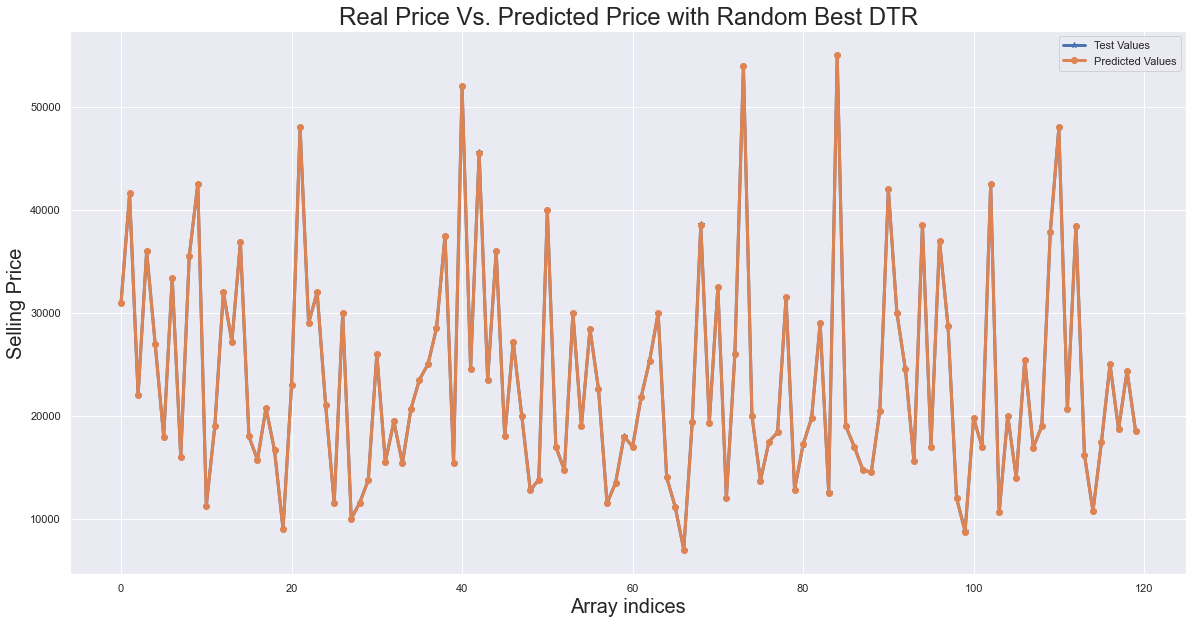

In [79]:
y_test
plt.figure(figsize=(20, 10))
plt.plot(range(0, 120), y_test[0:120], label="Test Values", marker="*", linewidth=3)
plt.plot(range(0, 120), output[0:120], label="Predicted Values", marker="o", linewidth=3)
plt.xlabel("Array indices",fontsize=20)
plt.ylabel("Selling Price",fontsize=20)
plt.title("Real Price Vs. Predicted Price with Random Best DTR",fontsize=24)
plt.legend()
plt.show()

In [76]:
from sklearn.tree import export_graphviz  

# Trying with some constraints on tree

regressor = DecisionTreeRegressor(max_depth = 3, max_leaf_nodes=8)
regressor.fit(x_train,y_train)
out=regressor.predict(x_test)
mse_regressor=MSE(y_test,out)**(1/2)
print(mse_regressor)

2522.354907740478


In [77]:
#exporting the .dot file to see decision tree diagram
export_graphviz(regressor, out_file ='tree3.dot', 
               feature_names =["model","year", "price", "transmission", "mileage","fuelType","tax","mpg","engineSize"]) 
y_test["price"].mean()

22830.203125

In [78]:
#converting the .dot file to .png for handy visualization purposes
import pydot

(graph,) = pydot.graph_from_dot_file('tree3.dot')
graph.write_png('diff.png')

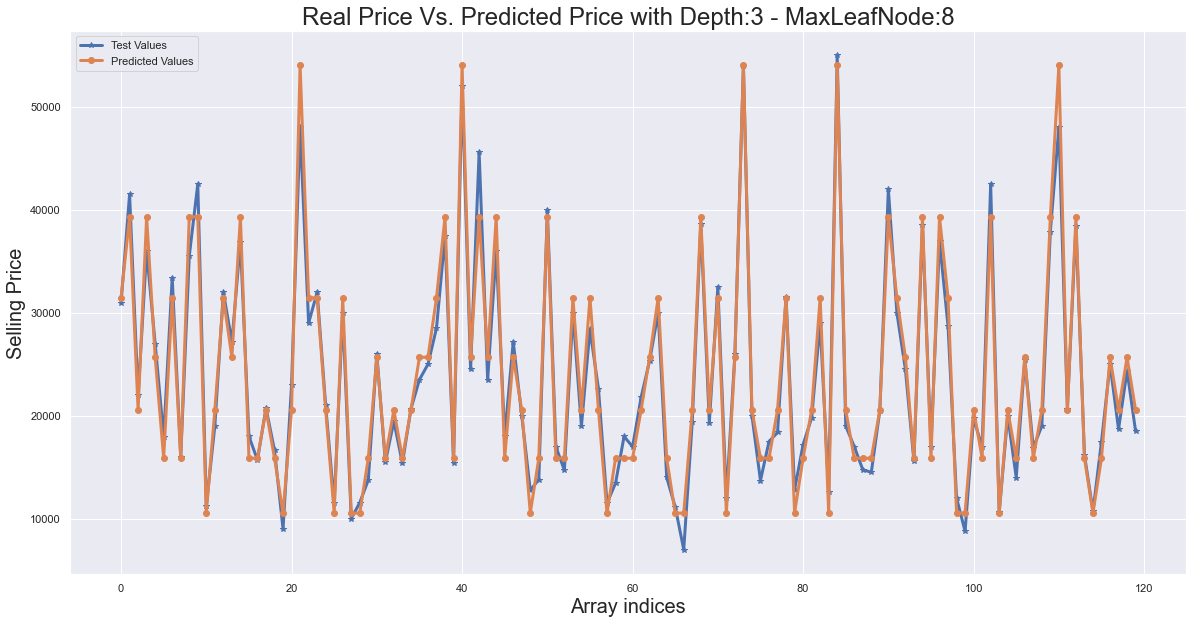

In [80]:
#For readibility purposes, I just took first 120 test values into visualization
plt.figure(figsize=(20, 10))
plt.plot(range(0, 120), y_test[0:120], label="Test Values", marker="*", linewidth=3)
plt.plot(range(0, 120), out[0:120], label="Predicted Values", marker="o", linewidth=3)
plt.xlabel("Array indices",fontsize=20)
plt.ylabel("Selling Price",fontsize=20)
plt.title("Real Price Vs. Predicted Price with Depth:3 - MaxLeafNode:8",fontsize=24)
plt.legend()
plt.show()

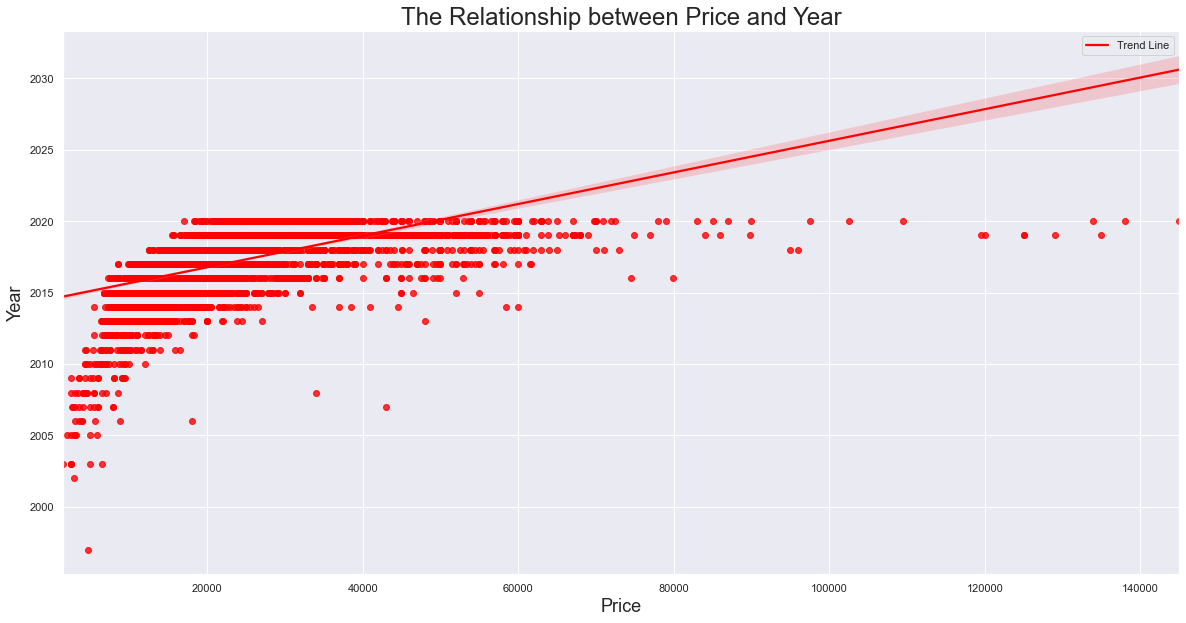

In [81]:
sns.set(color_codes=True)
fig = plt.figure(figsize=(20, 10))
sns.regplot(x=x_train[["price"]].astype(float), y=x_train[["year"]].astype(float), color='red', marker='o')
plt.legend(labels=['Trend Line'])
plt.title('The Relationship between Price and Year', size=24)
plt.xlabel('Price', size=18)
plt.ylabel('Year', size=18);

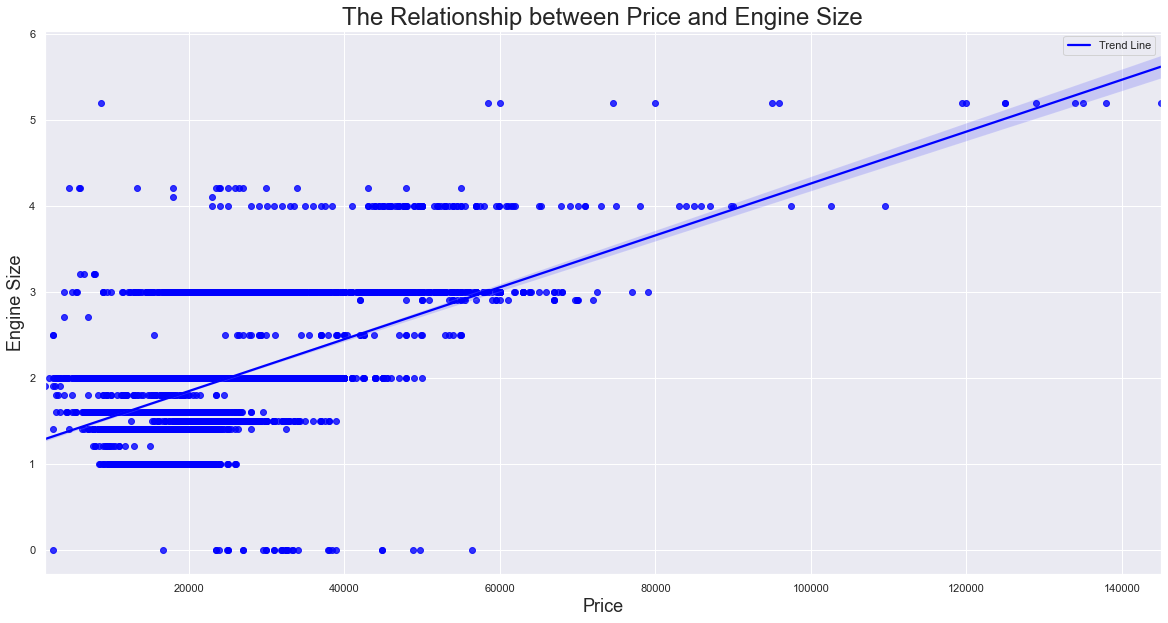

In [82]:
fig = plt.figure(figsize=(20, 10))
sns.regplot(x=x_train[["price"]].astype(float), y=x_train[["engineSize"]].astype(float), color='blue', marker='o')
plt.legend(labels=['Trend Line'])
plt.title('The Relationship between Price and Engine Size', size=24)
plt.xlabel('Price', size=18)
plt.ylabel('Engine Size', size=18);